# Viewing the downloaded OS Terrain 50 data

This notebook shows how you can use the various methods in `nevis` to visualise the downloaded Terrain 50 data set.

For more information on this data set, the British National Grid, or other coordinate systems, please [README.md](https://github.com/CardiacModelling/BenNevis/blob/main/README.md).

We start by downloading the data (if this isn't done already) and - just for fun - printing the nevis version number:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nevis

nevis.download_os_terrain_50()
nevis.howdy()

Downloaded, unpacked, and processed file already found: Skipping.

                |>          
 Starting Ben   |   Nevis   
               / \    version
            /\/---\     0.0.5
           /---    \/\      
        /\/   /\   /  \     
     /\/  \  /  \_/    \    
    /      \/           \   


Next, we make a plot of the whole data set using [nevis.plot](https://nevis.readthedocs.io/en/latest/plot.html):

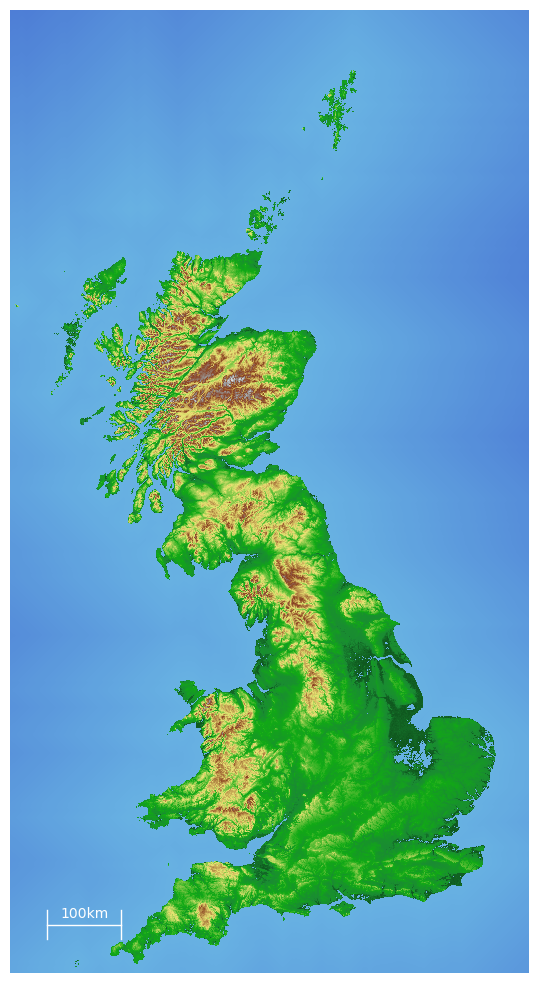

In [2]:
nevis.plot()
plt.show()

Note how some areas, particularly near Cambridgeshire and Norwich appear to be under water.
This is a result of how we're plotting: 
Each point is represented as a height, which is represented by a colour in the image.
For 0m we plot light blue (and darker blue for < 0), so areas that are below sea level (even if not below the sea) will appear as blue on this map.

To make the image fit on screen, we have downsampled by a factor 27, meaning each square of 27x27 data points is represented by a single pixel (we used the bottom-left value, no averaging or anything clever like that).
We can change the amount of downsampling to get a different size image:

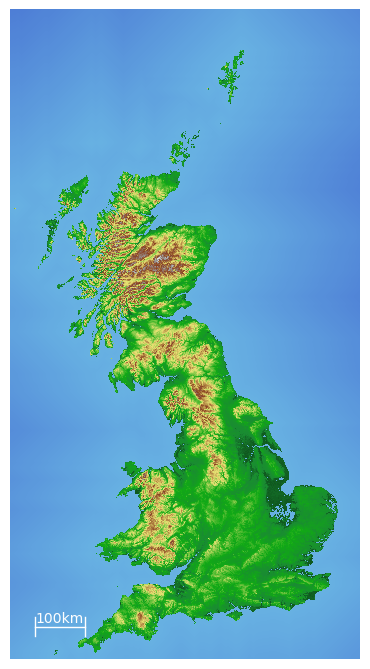

In [3]:
nevis.plot(downsampling=40)
plt.show()

## Points of interest

If we have particular points we want to plot on the map, we can do this too:

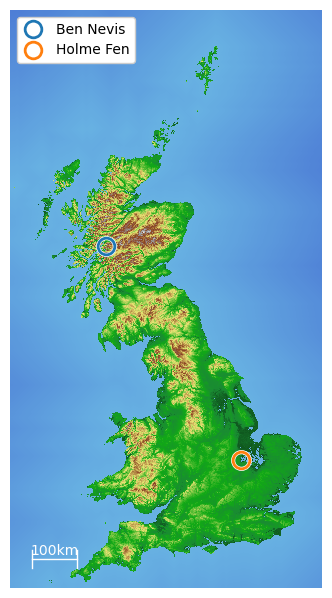

In [4]:
labels = {
    'Ben Nevis': nevis.ben(),
    'Holme Fen': nevis.fen(),
}

nevis.plot(labels=labels, downsampling=45)
plt.show()

Here we used "famous" points known by `nevis`, but we can also define our own points using [Coords](https://nevis.readthedocs.io/en/latest/bng.html#coordinates).
To find these points, we can use websites like [britishnationalgrid.uk](https://britishnationalgrid.uk).

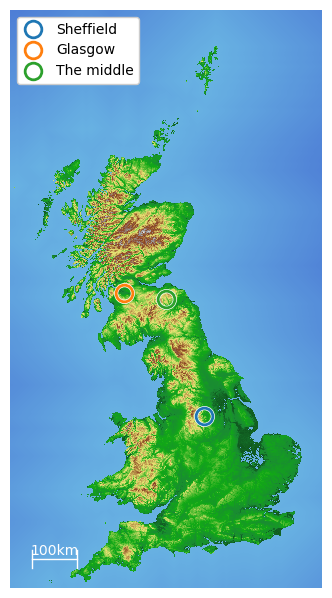

In [5]:
labels = {
    'Sheffield': nevis.Coords(gridx=435528, gridy=387389),    # Grid position in meters from bottom-left
    'Glasgow': nevis.Coords.from_square('NS5864'),            # British National Grid square
    'The middle': nevis.Coords(normx=0.5, normy=0.5),         # Normalised coordinates
}
nevis.plot(labels=labels, downsampling=45)
plt.show()

We can even use the [Hill](https://nevis.readthedocs.io/en/latest/bng.html#nevis.Hill) class to get names and locations of GB's hills:

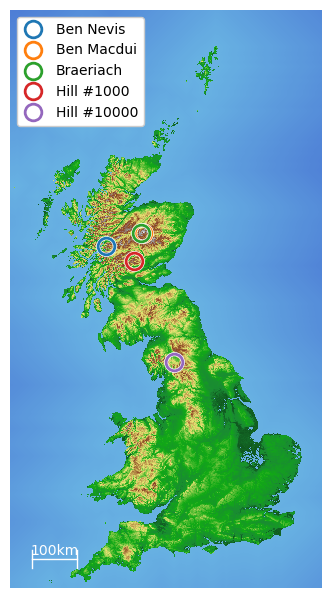

In [6]:
hill_1 = nevis.Hill.by_rank(1)
hill_2 = nevis.Hill.by_rank(2)
hill_3 = nevis.Hill.by_rank(3)
hill_1000 = nevis.Hill.by_rank(1000)
hill_10000 = nevis.Hill.by_rank(10000)

labels = {
    hill_1.name: hill_1.coords,
    hill_2.name: hill_2.coords,
    hill_3.name: hill_3.coords,
    'Hill #1000': hill_1000.coords,
    'Hill #10000': hill_10000.coords,
}
nevis.plot(labels=labels, downsampling=45)
plt.show()

## Explored points and trajectories

To visualise how [hill-climbing algorithms](https://en.wikipedia.org/wiki/Hill_climbing) move over this surface, we might want to plot _trajectories_ too:

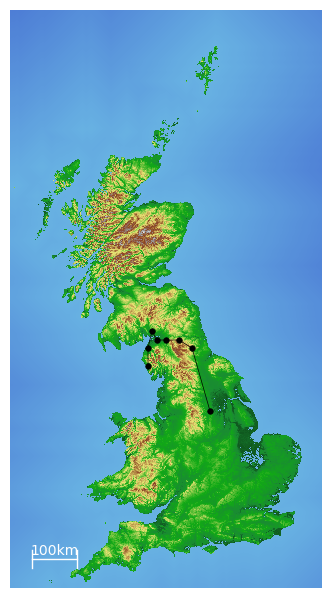

In [7]:
trajectory = np.array([
    (310e3, 500e3),  # 310km to the east of the bottom-left point, 500km to the north
    (310e3, 540e3),
    (320e3, 580e3),
    (330e3, 560e3),
    (350e3, 560e3),
    (380e3, 560e3),
    (410e3, 540e3),
    (450e3, 400e3),
])
nevis.plot(trajectory=trajectory, downsampling=45)
plt.show()

Some other methods, in particularly ones based on statistical sampling, might also want to show points that don't below to a trajectory:

(320, 2)


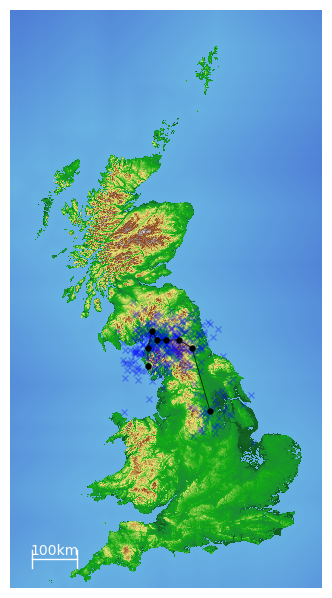

In [8]:
points = []
for x, y in trajectory:
    points.extend(np.random.multivariate_normal((x, y), cov=((1e9, 0), (0, 1e9)), size=40))
points = np.array(points)
print(points.shape)
nevis.plot(trajectory=trajectory, points=points, downsampling=45)
plt.show()

## Showing grid squares and zooming in

The British National Grid (BNG) divides the area around [Great Britain](https://en.wikipedia.org/wiki/Great_Britain) (Scotland, Wales & England, but not the Channel Islands or the Isle of Man) into named squares.
We can plot these on the map too:

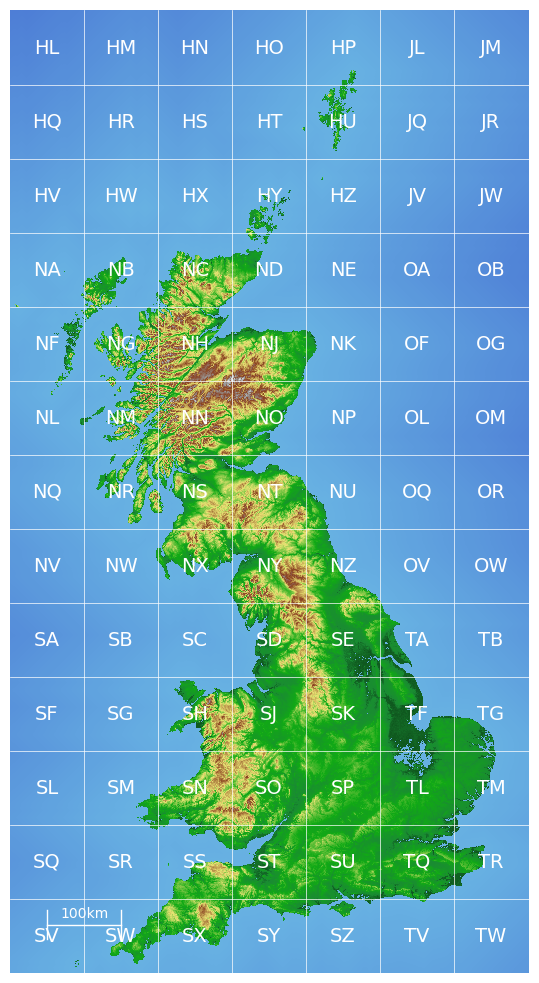

In [9]:
nevis.plot(big_grid=True)
plt.show()

We can obtain the coordinates of a named square from the `Coords` class, and use it to set boundaries for our plot:

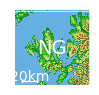

In [10]:
# Get the square's coords
square = nevis.Coords.from_square_with_size('NG')
x, y = square[0].grid

# Define boundaries based on the square
boundaries = [x, x + square[1], y, y + square[1]]

# Plot
nevis.plot(boundaries=boundaries, big_grid=True)
plt.show()

Depending on the exact settings, you might notice a few oddities in where the grid is placed.
For example, there seems to be some spacing between the grid lines and the image border.
This is due to the downsampling happening inside the `plot()` method.
Because we want to avoid the need to interpolate, it will slightly adjust the boundaries of the plotted region instead.
In addition, the grid lines are plotted by matplotlib, using a method that _does_ interpolate.

To get a nicer plot, we'll reduce the amount of downsampling, and use the `small_grid` setting instead of `big_grid`:

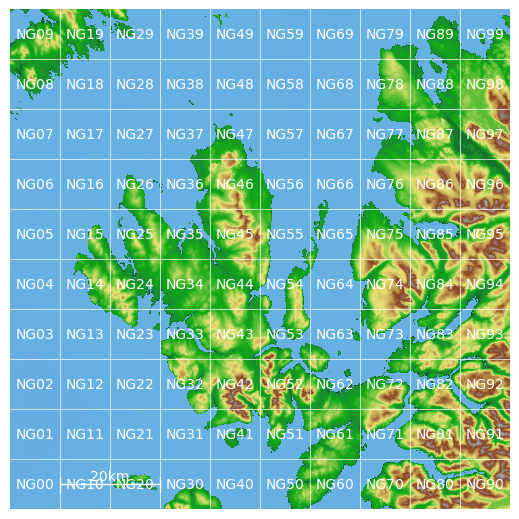

In [11]:
nevis.plot(boundaries=boundaries, small_grid=True, downsampling=4)
plt.show()

Using the same method, we can zoom in on the small grid areas too:

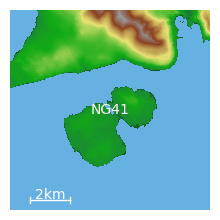

In [12]:
# Zoom in on square NG41
square = nevis.Coords.from_square_with_size('NG41')
x, y = square[0].grid
boundaries = [x, x + square[1], y, y + square[1]]

nevis.plot(boundaries=boundaries, small_grid=True, downsampling=1)
plt.show()

Note how there is no downsampling in this plot: all the data we have is shown.
Each pixel represents a height measured at the center of a 50x50m square.
(Note that we have to carefully set matplotlib's DPI setting to achieve this and prevent any resampling.)

If we like, we can zoom in even further, but this requires _zoom_ of the data (and so is no longer an "honest" plot of the data set):

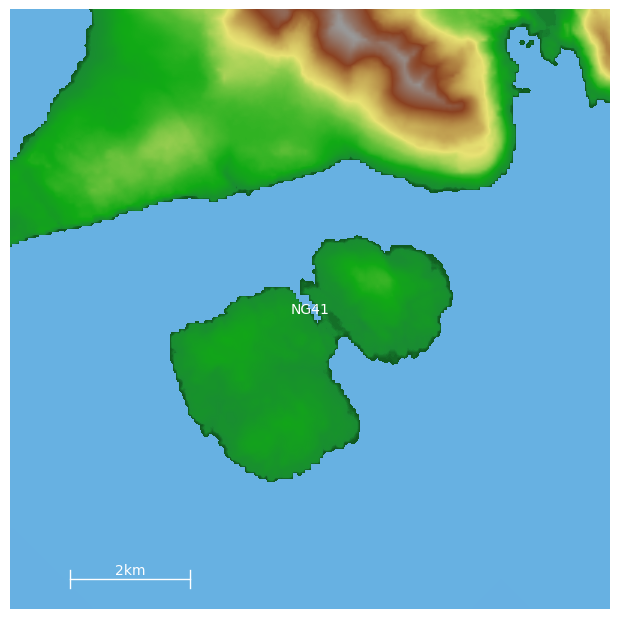

In [13]:
nevis.plot(boundaries=boundaries, small_grid=True, zoom=3)
plt.show()

Finally, instead of zooming in on squares, we can look at the area surrounding a point of interest.
For example, we can plot the 40x40 km area around the peak of Ben Nevis:

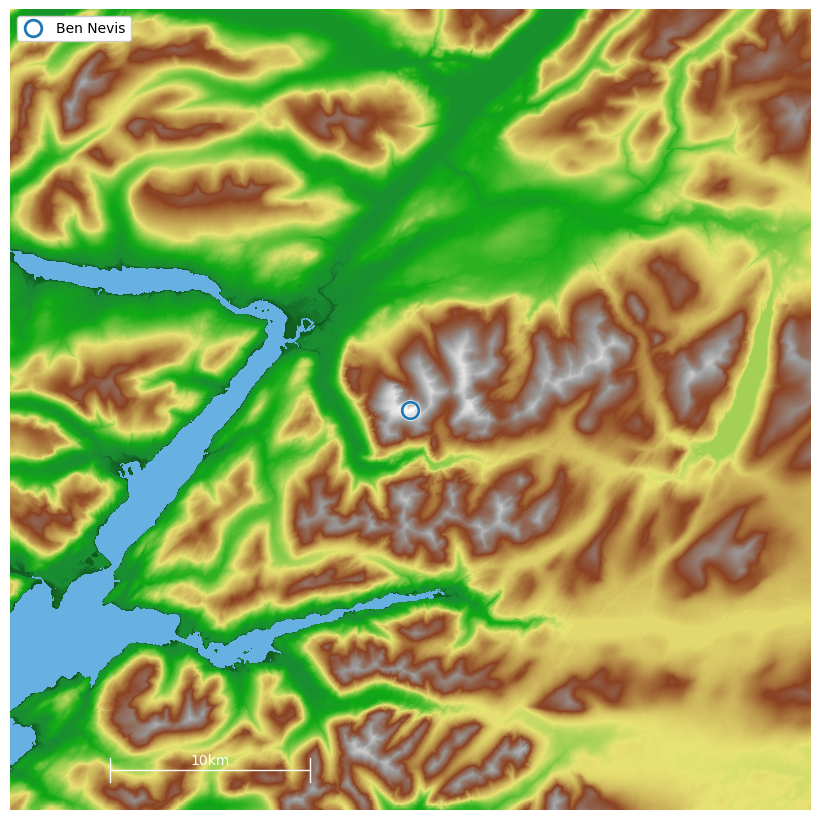

In [14]:
b = nevis.ben().grid
d = 20e3  # 20 km
boundaries = [b[0] - d, b[0] + d, b[1] - d, b[1] + d]
labels = {'Ben Nevis': nevis.ben()}

nevis.plot(boundaries=boundaries, labels=labels, downsampling=1)
plt.show()

## Customisation

So far we have ignored the values returned by `nevis.plot`.
We can see what these are here: https://nevis.readthedocs.io/en/latest/plot.html#nevis.plot

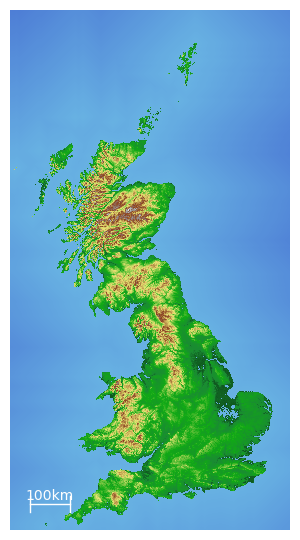

In [15]:
fig, ax, heights, g = nevis.plot(downsampling=50)
plt.show()

The first object returned is the created matplotlib [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) object.
If you want to do this, and don't care about showing the figure directly on screen, you can call `nevis.plot` with `headless=True` to bypass `pyplot` and be slightly more memory-efficient.

The second object returned is a matplotlib [Axes](https://matplotlib.org/stable/api/axes_api.html) object, which we can use to make additions to our plot:

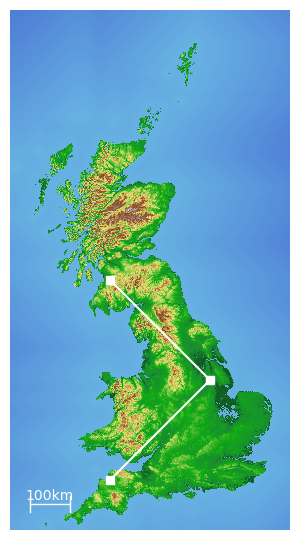

In [16]:
fig, ax, heights, g = nevis.plot(downsampling=50)
ax.plot([100, 200, 100], [50, 150, 250], 's-', color='white')
plt.show()

Note that the coordinates here are in pixels!
To convert from coordinates in meters to coordinates in pixels, we use the 4th returned argument `g`:

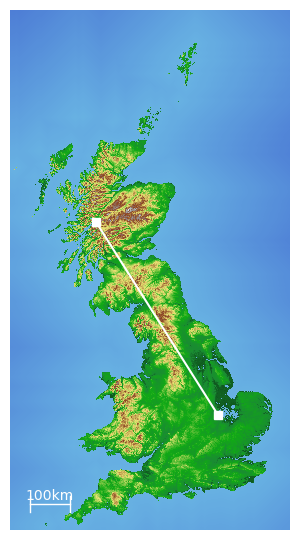

In [17]:
fig, ax, heights, g = nevis.plot(downsampling=50)

x, y = nevis.ben().grid
x1, y1 = g(x, y)

x, y = nevis.fen().grid
x2, y2 = g(x, y)

ax.plot([x1, x2], [y1, y2], 's-', color='white')

plt.show()

Finally, the `heights` variable contains the downsampled heights data:

In [18]:
print(heights.shape)
print(heights[100, 100])
print(heights[101, 100])

(520, 280)
240.5
207.6
